In [5]:
import numpy as np
import matplotlib.pyplot as plt
from molecule import CaOH, CaH, mu_N, gI
from scipy.constants import h, k
%matplotlib inline

import qls
import utils as ut

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from typing import TypeAlias
from pathlib import Path
from wigners import clebsch_gordan
from scipy.constants import h, physical_constants

In [ ]:
def plot_zeeman_levels(molecule, j: int):
    """
    Plot the Zeeman energies of all states in a given j value.
    """
    states_in_j = molecule.state_df.loc[molecule.state_df["j"] == j]
    transitions_in_j = molecule.transition_df[molecule.transition_df["j"] == j]
    m = states_in_j["m"].to_numpy()
    energies = states_in_j["zeeman_energy_khz"].to_numpy()
    spin_up = states_in_j["spin_up"].to_numpy()
    spin_down = states_in_j["spin_down"].to_numpy()
    colors = spin_up**2 - spin_down**2

    dim = 2*j+6

    fig, ax = plt.subplots(figsize=(dim, 8))
    for mi, ei, ci in zip(m, energies, colors):
        ax.hlines(ei, mi - 0.3, mi + 0.3, colors=plt.cm.plasma(ci), linewidth=3)

    ax.set_xlabel("m")
    ax.set_ylabel("Zeeman energy (kHz)")
    ax.set_title(f"Zeeman energies of all states in j={j}, B={molecule.b_field_gauss} G")

    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-1, vmax=1), cmap="plasma"), ax=ax)
    cbar.set_label("spin")

    ax.set_xlim(-j-1, j+1)
    ax.set_xticks([i+0.5 for i in range(-j - 1, j + 1)])


    min = np.min(states_in_j["zeeman_energy_khz"])
    max = np.max(states_in_j["zeeman_energy_khz"])

    delta = max - min


        # plot the difference between neibouring states on arrows conecting them
    for transition in transitions_in_j.itertuples():
        m1 = transition.m1
        xi1 = transition.xi1
        energy1 = molecule.state_df.loc[(molecule.state_df["j"] == j) & (molecule.state_df["m"] == m1) & (molecule.state_df["xi"] == xi1)].iloc[0].zeeman_energy_khz
        m2 = transition.m2
        xi2 = transition.xi2
        energy2 = molecule.state_df.loc[(molecule.state_df["j"] == j) & (molecule.state_df["m"] == m2) & (molecule.state_df["xi"] == xi2)].iloc[0].zeeman_energy_khz
        energy_diff = transition.energy_diff
        coupling = transition.coupling
        ax.annotate(
            "", 
            xy=(float(m1)-1.0, float(energy1) + float(energy_diff)), 
            xytext=(float(m1), float(energy1)),
            arrowprops=dict(arrowstyle='<->', color='gray', lw=1)
        )
        # add the energy difference as text on the arrow
        ax.text((3*m1 + m2) / 4.0 -0.5, (3*energy1 + energy2) / 4.0, f"{energy_diff:.2f} kHz", fontsize=10, color="black")
        # add the coupling strength as text on the arrow
        ax.text((3*m1 + m2) / 4.0 -0.5, (3*energy1 + energy2) / 4.0 - (delta*0.9/30), f"{coupling:.5f}", fontsize=10, color="red")

    plt.show()
    plt.close()

In [ ]:
energy1 = 20
energy2 = 12

diff = (3*energy1 + energy2) / 4.0

print(diff)


1.8


In [36]:
states_in_j = mo1.state_df.loc[mo1.state_df["j"] == 6]
states_in_j

,j,m,xi,spin_up,spin_down,zeeman_energy_khz,rotation_energy_ghz
72,6,-6.5,False,0.000000,1.000000,5.351130,460.32
73,6,-5.5,False,0.184905,-0.982756,6.718904,460.32
74,6,-4.5,False,0.219811,-0.975542,7.902899,460.32
75,6,-3.5,False,0.231086,-0.972933,8.966936,460.32
76,6,-2.5,False,0.231717,-0.972783,9.944713,460.32
77,6,-1.5,False,0.226252,-0.974069,10.856597,460.32
78,6,-0.5,False,0.216684,-0.976242,11.716014,460.32
79,6,0.5,False,0.203941,-0.978983,12.532371,460.32
80,6,1.5,False,0.188377,-0.982097,13.312559,460.32
81,6,2.5,False,0.169934,-0.985455,14.061805,460.32


In [43]:
min = np.min(states_in_j["zeeman_energy_khz"])
max = np.max(states_in_j["zeeman_energy_khz"])
print(min, max)

-14.291129560889999 16.160779320766498


In [62]:
b_field_gauss = 5
j_max = 13
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)

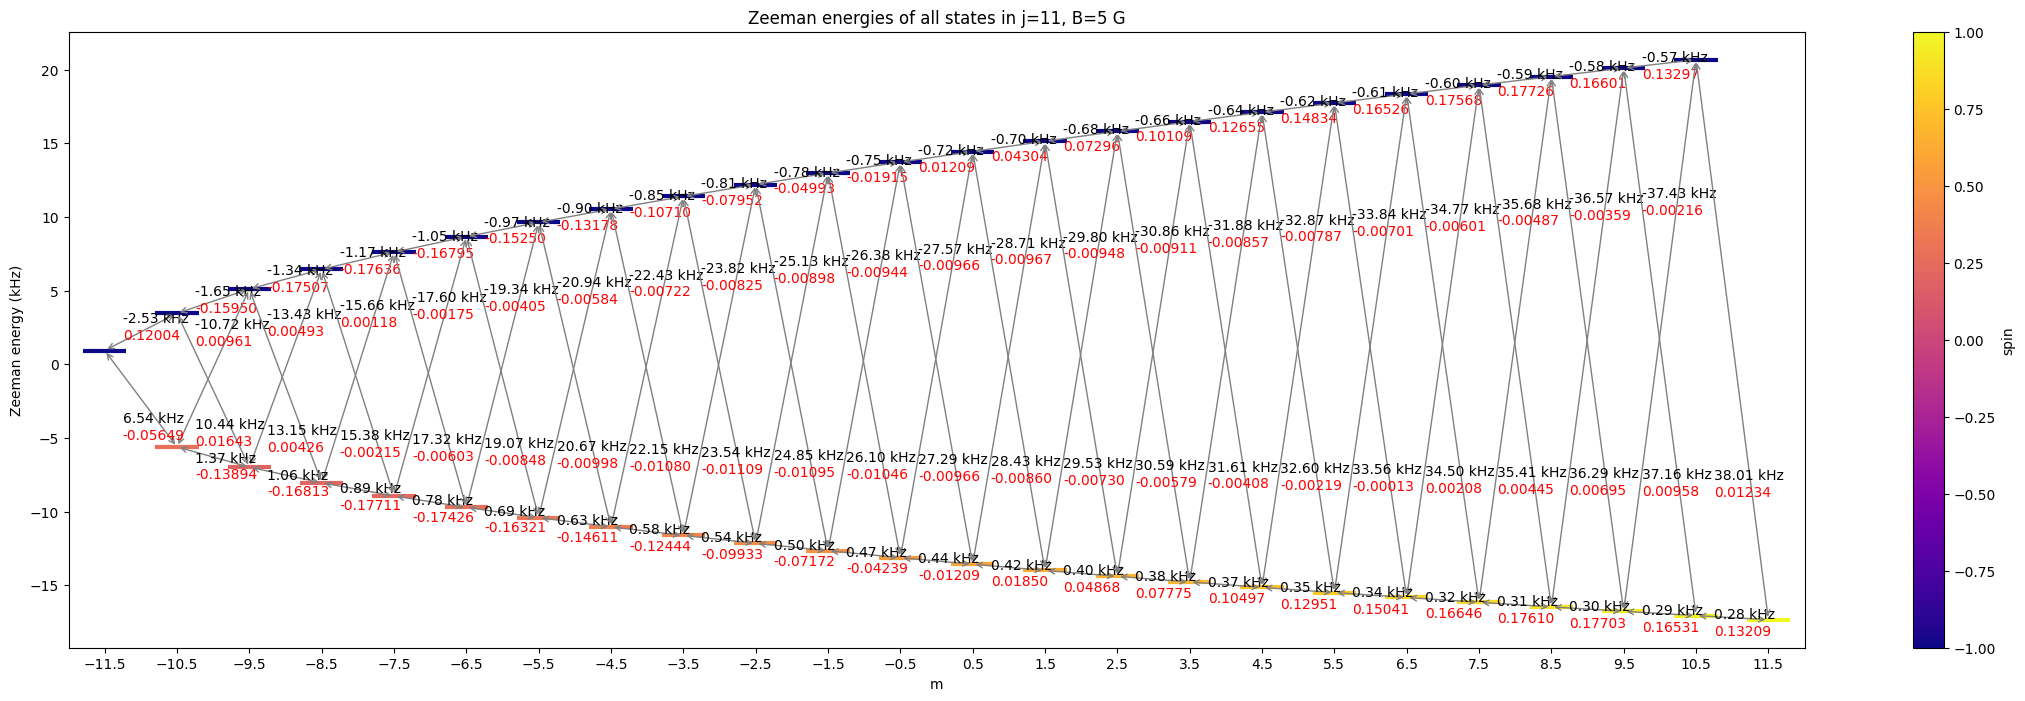

In [67]:
plot_zeeman_levels(mo1, 11)